In [2]:
!pip install -U folium
!pip install -U branca
!pip install geopandas

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Attempting uninstall: folium
    Found existing ins

In [3]:
import pandas as pd
import re
import requests
import json
import folium
import shapely 
import random
import warnings
import scipy

Text(143.91233936591485, 0.5, 'Latitude')

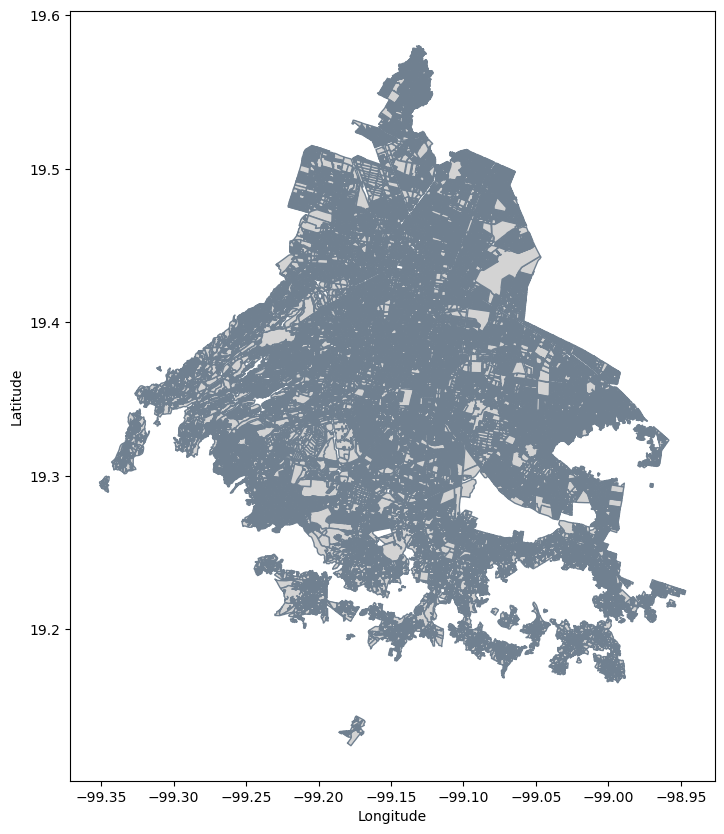

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
blocks = gpd.read_file('/project/blocks/poligono_manzanas_cdmx.shp')
blocks.plot(ax=ax, color='lightgrey', edgecolor='slategrey');

# Adjust x and y limits (longitude, latitude) to zoom into an area
# Replace these values with the actual range you're interested in

# Add x and y-axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

<AxesSubplot:>

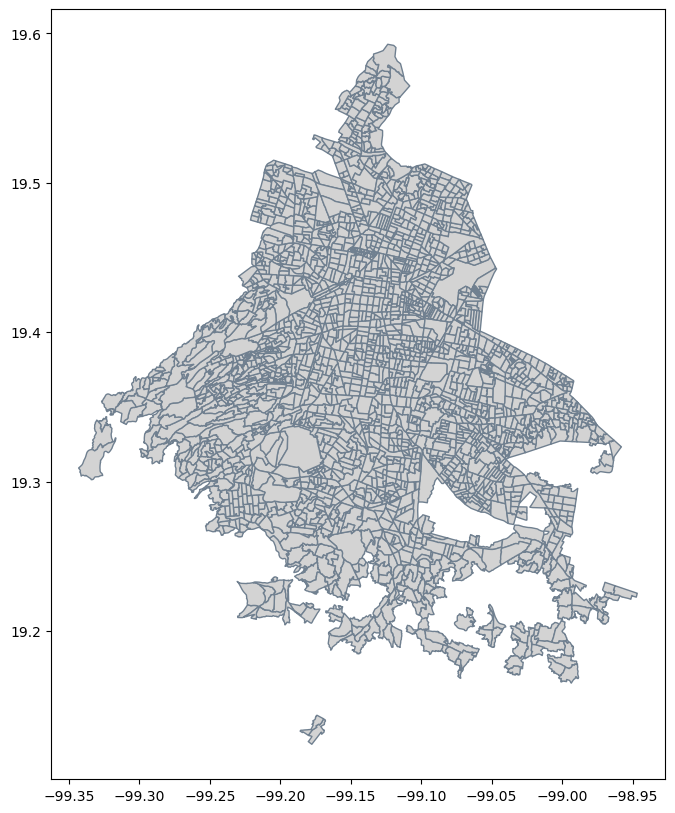

In [44]:
urban = gpd.read_file('/project/geo/poligono_ageb_urbanas_cdmx.shp')
# Convert the GeoDataFrame to WGS84
fig, ax = plt.subplots(figsize=(10, 10))
urban = urban.to_crs('EPSG:4326')
urban.plot(ax=ax, color='lightgrey', edgecolor='slategrey')

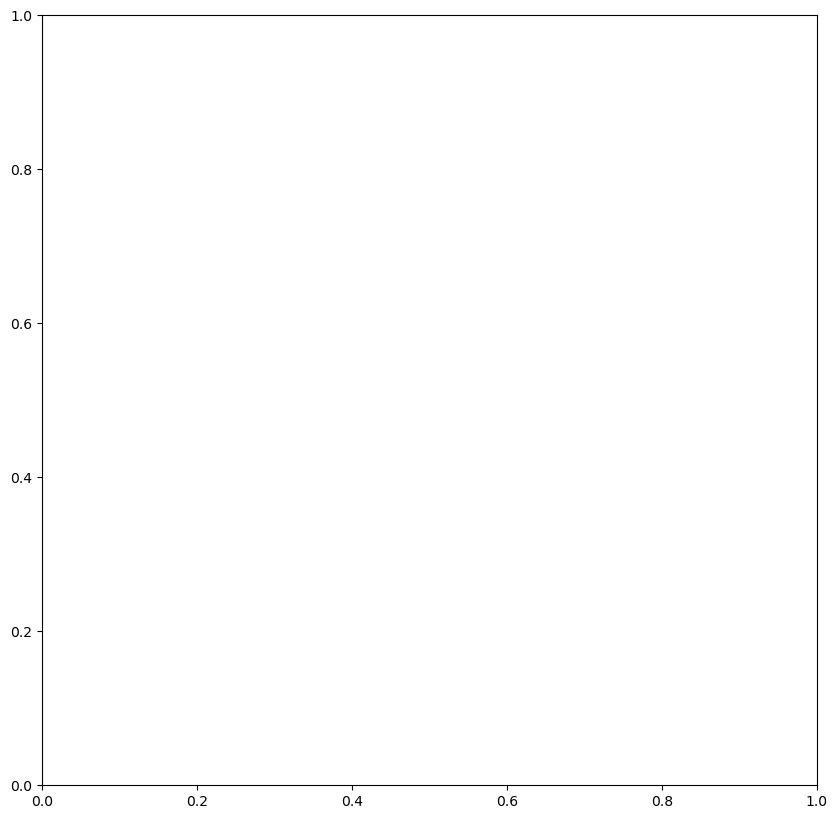

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
alcaldia = gpd.read_file('/project/geo/poligonos_alcaldias_cdmx.shp')
#alcaldia.plot(ax=ax, color='lightgrey', edgecolor='slategrey');

In [23]:
from shapely import wkt

# Step 1: Load the data with pandas
df = pd.read_csv('/project/grouped_public.csv')

# Step 2: Convert the 'geometry' column to actual geometry
df['geometry'] = df['geometry'].apply(wkt.loads)

# Now create a GeoDataFrame from the DataFrame
public = gpd.GeoDataFrame(df, geometry='geometry')

In [25]:
# Set the original CRS of your geodataframe 'gdf' to 'EPSG:32614'
public.crs = 'EPSG:32614'

# Convert the GeoDataFrame to WGS84
public = public.to_crs('EPSG:4326')





In [26]:
print(public['geometry'])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

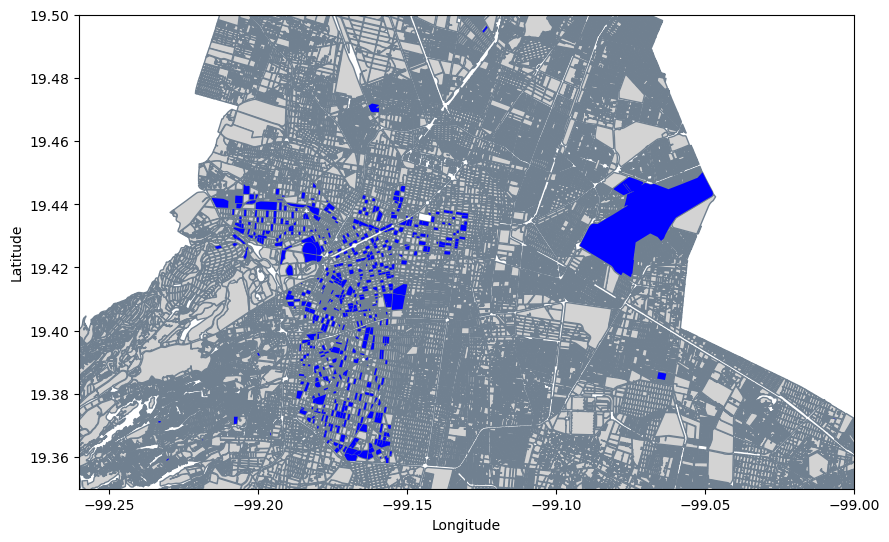

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

blocks.plot(ax=ax, color='lightgrey', edgecolor='slategrey')
public.plot(ax=ax, color='blue')

# Optional: setting the labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([-99.26, -99.00]) # Longitude should increase from left to right
ax.set_ylim([19.35, 19.50])
plt.show()


In [15]:
blocks.set_crs("EPSG:4326", inplace=True);
#public.set_crs("EPSG:4326", inplace=True);

In [5]:
public2 = pd.read_csv('/project/coordinate_level_data1.csv')



ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
public2 = public2.drop_duplicates()

In [11]:
public2=public2.fillna(0.0)

In [9]:
public2.drop(['Unnamed: 0'],
             axis=1, inplace=True)

In [12]:
public2.head()

,geometry,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,Income,...,Suburban Train,Metrobus,Light Rail,Trolleybus,RTP,Raised Trolleybus,Concessioned,e-bike,Cablebus,Total coverage of transport
0,POLYGON ((475863.7051603525 2140609.8310442655...,1.0,0.0,0.941538,1.0,4,4,1,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
1,POLYGON ((475863.7051603525 2140609.8310442655...,1.0,0.0,0.941538,1.0,4,4,1,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,POLYGON ((475863.7051603525 2140609.8310442655...,1.0,0.0,0.941538,1.0,4,4,1,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,POLYGON ((475863.7051603525 2140609.8310442655...,1.0,0.0,0.941538,1.0,4,4,1,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,POLYGON ((475863.7051603525 2140609.8310442655...,1.0,0.0,0.941538,1.0,4,4,1,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


In [20]:
df_grouped1 = public2.groupby('geometry').mean().reset_index()


In [23]:
df_grouped1.shape

(66789, 28)

In [25]:
df_grouped1= pd.read_csv('/project/grouped_public_large.csv')



In [41]:
from shapely import wkt
# Step 2: Convert the 'geometry' column to actual geometry
df_grouped1['geometry'] = df_grouped1['geometry'].apply(wkt.loads)

# Now create a GeoDataFrame from the DataFrame
df_grouped_x = gpd.GeoDataFrame(df_grouped1, geometry='geometry')

In [32]:
from shapely import wkt
# Step 2: Convert the 'geometry' column to actual geometry
df_sample['geometry'] = df_sample['geometry'].apply(wkt.loads)

# Now create a GeoDataFrame from the DataFrame
df_sample_x = gpd.GeoDataFrame(df_sample, geometry='geometry')

In [37]:
# Set the original CRS of your geodataframe 'gdf' to 'EPSG:32614'
df_grouped_x.crs = 'EPSG:32614'
# Set the original CRS of your geodataframe 'gdf' to 'EPSG:32614'
df_sample_x.crs = 'EPSG:4326'

# Convert the GeoDataFrame to WGS84
df_grouped_x = df_grouped_x.to_crs('EPSG:4326')

# Convert the GeoDataFrame to WGS84
df_sample_x = df_sample_x.to_crs('EPSG:4326')

In [38]:
df_sample_x.head()

,Unnamed: 0,geometry,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,...,Suburban Train,Metrobus,Light Rail,Trolleybus,RTP,Raised Trolleybus,Concessioned,e-bike,Cablebus,Total coverage of transport
86,86,"POLYGON ((-99.32569 19.33118, -99.32543 19.331...",1.5,0.0,0.976452,1.0,5.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.000,0.0,1.000,0.0,0.0,2.00
33063,33063,"POLYGON ((-99.12250 19.45345, -99.12288 19.453...",1.5,0.0,0.806875,1.5,3.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,1.000,0.0,1.000,0.0,0.0,3.00
5370,5370,"POLYGON ((-99.22671 19.36724, -99.22634 19.367...",2.0,0.0,0.554286,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.000,0.0,1.000,0.0,0.0,2.00
29348,29348,"POLYGON ((-99.13152 19.28046, -99.13105 19.280...",1.0,0.0,0.629548,1.0,2.0,2.0,5.0,2.0,...,0.0,0.0,1.0,0.0,0.250,0.0,0.250,0.0,0.0,1.50
49546,49546,"POLYGON ((-99.07171 19.32692, -99.07173 19.326...",1.0,0.0,0.825484,3.0,2.0,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.125,0.0,0.125,0.0,0.0,0.25


In [29]:
df_sample = df_grouped1.sample(frac=0.05)

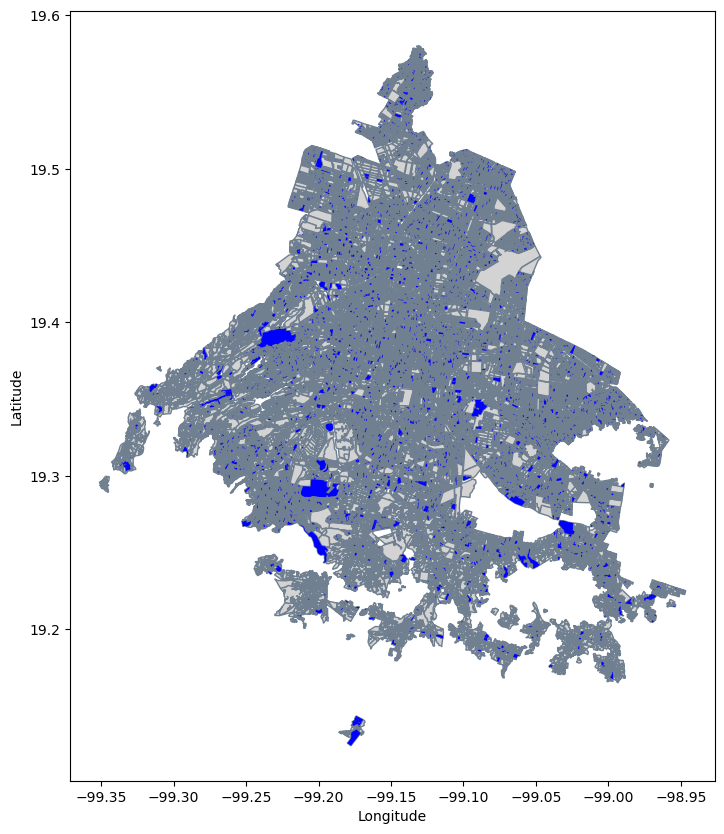

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

blocks.plot(ax=ax, color='lightgrey', edgecolor='slategrey')
df_sample_x.plot(ax=ax, color='blue')

# Optional: setting the labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_xlim([-99.26, -99.00]) # Longitude should increase from left to right
#ax.set_ylim([19.35, 19.50])
plt.show()

In [49]:
joined_gdf.columns

Index(['geometry', 'Public WiFi', 'number of bikes', 'Mean Inhabitants',
       'Employment', 'Crime Degree', 'school_count', 'Flooding',
       'hospitals_count', 'Income', 'Deaths', 'Injuries', 'Car Overturned',
       'Collision', 'Pedestrian fell', 'Run over', 'Metro', 'Suburban Train',
       'Metrobus', 'Light Rail', 'Trolleybus', 'RTP', 'Raised Trolleybus',
       'Concessioned', 'e-bike', 'Cablebus', 'Total coverage of transport',
       'index_right', 'CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO'],
      dtype='object')

In [51]:
alcaldia

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
5,09007,09,007,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381..."
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
9,09011,09,011,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323..."


In [53]:
joined_gdf.columns

Index(['geometry', 'Public WiFi', 'number of bikes', 'Mean Inhabitants',
       'Employment', 'Crime Degree', 'school_count', 'Flooding',
       'hospitals_count', 'Income', 'Deaths', 'Injuries', 'Car Overturned',
       'Collision', 'Pedestrian fell', 'Run over', 'Metro', 'Suburban Train',
       'Metrobus', 'Light Rail', 'Trolleybus', 'RTP', 'Raised Trolleybus',
       'Concessioned', 'e-bike', 'Cablebus', 'Total coverage of transport',
       'NOMGEO'],
      dtype='object')

In [45]:
import geopandas as gpd


# Spatial join - assigning each block to its respective constituency.
# Note: 'within' ensures that we're matching blocks that fall within constituencies.
joined_gdf = gpd.sjoin(df_grouped_x, alcaldia, how='inner', op='intersects')




/opt/anaconda/envs/Python3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/tmp/ipykernel_173/3430979852.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(df_grouped_x, alcaldia, how='inner', op='intersects')


In [66]:
# List of columns to exclude from aggregation
exclude_columns = ['geometry', 'NOMGEO']

# List of columns to aggregate
agg_columns = [col for col in joined_gdf.columns if col not in exclude_columns]

# Create a dictionary with column names as keys and 'mean' as values for aggregation
agg_dict = {col: 'mean' for col in agg_columns}

# Aggregate data based on the constituency level
aggregated_data = joined_gdf.groupby('NOMGEO').agg(agg_dict).reset_index()

# Merge aggregated data back with the constituency GDF to maintain geometries
final_gdf = alcaldia.merge(aggregated_data, on='NOMGEO')

In [67]:
final_gdf.drop(['CVEGEO','CVE_ENT','CVE_MUN','NOMGEO'],axis=1,inplace=True)

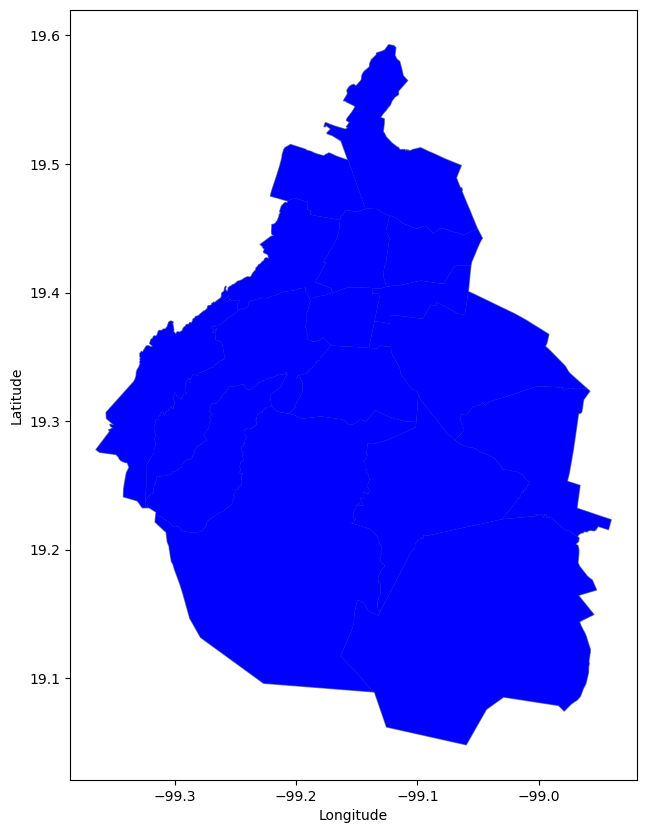

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

alcaldia.plot(ax=ax, color='lightgrey', edgecolor='slategrey')
final_gdf.plot(ax=ax, color='blue')

# Optional: setting the labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_xlim([-99.26, -99.00]) # Longitude should increase from left to right
#ax.set_ylim([19.35, 19.50])
plt.show()

In [27]:
df_grouped_x.to_csv('grouped_public_large.csv')

In [69]:
final_gdf.to_csv('alcaldia.csv')

In [68]:
final_gdf.head(16)

,geometry,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,Income,...,Suburban Train,Metrobus,Light Rail,Trolleybus,RTP,Raised Trolleybus,Concessioned,e-bike,Cablebus,Total coverage of transport
0,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",1.082416,0.000000,0.717193,1.598501,2.864077,5.927807,4.715688,7.265831,0.000000,...,0.024825,0.156068,0.000000,0.282280,0.546509,0.000000,0.937291,0.000000,0.000000,2.348257
1,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",0.960090,0.000000,0.646508,1.208411,1.944098,4.068536,3.877691,5.334579,0.046106,...,0.000000,0.014852,0.163093,0.098954,0.469922,0.000000,0.836842,0.000552,0.000000,1.782078
2,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",0.697079,0.000000,0.771772,1.122403,2.384222,4.370370,0.883469,4.880759,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.602010,0.000000,0.895999,0.000000,0.000000,1.498009
3,"POLYGON ((-99.11124 19.56150, -99.11485 19.557...",0.980946,0.000000,0.839833,1.109321,3.227004,4.187342,3.867348,5.567664,0.000000,...,0.000004,0.261873,0.000000,0.141802,0.525821,0.000000,0.850758,0.000000,0.008772,2.062338
4,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",1.032558,0.000000,0.824333,1.704071,3.040027,4.384536,4.957179,4.599384,0.000000,...,0.000000,0.261847,0.000000,0.001026,0.350972,0.000000,0.838671,0.000000,0.000000,1.930714
5,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",0.823145,0.000000,0.939915,1.305300,3.820198,3.741722,4.124006,4.888507,0.000000,...,0.000000,0.037313,0.000000,0.002797,0.386874,0.015018,0.806998,0.000000,0.012163,1.564454
6,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",1.039395,0.000000,0.888307,0.966874,3.228951,3.962043,1.067288,5.051760,0.152864,...,0.000000,0.000000,0.000000,0.000000,0.354704,0.000000,0.763605,0.000000,0.000000,1.118309
7,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",0.666517,0.000000,0.947730,0.626457,3.518984,2.076233,1.524514,2.749776,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.445314,0.000000,0.592277,0.000000,0.000000,1.037592
8,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",0.977837,0.000000,0.846705,1.256654,2.941001,5.505677,1.077393,6.213475,0.070538,...,0.000000,0.024917,0.000000,0.000681,0.622398,0.000000,0.756663,0.000546,0.000000,1.570452
9,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",0.809914,0.000000,0.895915,1.000000,3.447446,3.295599,3.777491,4.762974,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.358183,0.000000,0.857539,0.000000,0.000000,1.458651
